# Customer Churn Prediction in Banking Industry
`Authored by:` Muhammad Abuzar\
`DH-ID:` DHC-653\
`Where to contact:` abuzaransri87@gmail.com

## Introduction:
Customer churn occurs when customers stop doing business with an entity. In the banking industry, retaining existing customers is significantly more cost-effective than acquiring new ones. By leveraging machine learning, banks can identify high-risk customers who are likely to leave and take proactive measures to retain them. This project focuses on building a predictive pipeline to classify customers based on their likelihood of attrition.

## Problem Statment:
The objective of this task is to develop a robust **Binary Classification Model** that predicts whether a bank customer will churn (Leave the bank) or not. Given a dataset containing customer demographics, account details, and activity patterns, the goal is to:
- **Data Preparation:** Perform rigorous cleaning, handle categorical encoding, and prepare the data for modeling.
- **Predictive Modeling:** Implement an XGBoost Classifier to achieve high predictive accuracy.
- **Insight Generation:** Use Feature Importance to identify the key drivers—such as age, balance, or activity status—that contribute most to customer turnover.

In [14]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# load dataset
df = pd.read_csv('customer_churn_dataset.csv')

In [16]:
# check first few rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Cleaning & Preparation:

In [17]:
# check information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Understanding:
Upon initial inspection of the dataset using the .info() method, the following observations were made regarding the data structure and integrity:
- **Dataset Size:** The dataset contains 10,000 observations (rows) and 14 variables (columns).
- **Data Completeness:** All columns report 10,000 non-null values, indicating that there are no missing values in the dataset. This eliminates the need for imputation strategies.
- **Numerical Features:** Columns like CreditScore, Age, Tenure, Balance, NumOfProducts, and EstimatedSalary are correctly identified as integers or floats.
- **Categorical Features:** Geography, Gender, and Surname are stored as objects and will require encoding before model training.
- **Binary Flags:** Columns such as HasCrCard, IsActiveMember, and the target variable Exited are already in integer format (0 or 1).
- **Target Variable:** The column Exited serves as our label for classification, where 1 indicates a churned customer and 0 indicates a retained customer.

In [18]:
# descriptive statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Understanding:
After analyzing the descriptive statistics, the following conclusions were drawn regarding the feature distributions:
- **Credit Score:** Ranges from 350 to 850 (Correction: Usually the standard cap is 850). This follows a normal banking distribution with no unrealistic outliers.
- **Age Profile:** The customer base ranges from 18 to 92 years. This wide range allows the model to capture behavior across different life stages (students to retirees).
- **Customer Loyalty (Tenure):** Tenure ranges from 0 to 10 years, suggesting the dataset includes both brand-new and long-term loyal customers.
- **Product Usage:** Customers hold between 1 and 4 products. Typically, customers with 3 or 4 products are outliers in churn datasets and often show higher churn rates.
- **Data Integrity:** No negative values were found in columns like Balance or EstimatedSalary where they wouldn't make sense. The data is logically consistent and ready for preprocessing.

In [19]:
# check for duplicate rows
df.duplicated().sum()

np.int64(0)

**Finding:** No duplicate entries were found, confirming that each row represents a unique customer instance. This prevents the model from being biased toward repeated observations.

In [22]:
# drop irreelevant columns like 'customer_id', 'rownumber' and 'surname' as they do not contribute to the prediction of customer churn
df.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1, inplace=True)

In [23]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [25]:
# One-Hot Encoding for Geography and Gender
# drop_first=True helps avoid the dummy variable trap
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [28]:
# Renaming the target column from 'Exited' to 'Churned'
df.rename(columns={'Exited': 'Churned'}, inplace=True)

In [29]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [30]:
# define features and target variable
X = df.drop('Churned', axis=1)
y = df['Churned']

In [31]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# check shape of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 11)
X_test shape: (2000, 11)
y_train shape: (8000,)
y_test shape: (2000,)


## Model Training (XGBoost):

In [33]:
# import XG Boosting Classifier
from xgboost import XGBClassifier

# initialize the model
model = XGBClassifier(random_state=42)
# fit the model on training data
model.fit(X_train, y_train)
# make predictions on test data
y_pred = model.predict(X_test)

In [42]:
# import confustion matrix, accuracy score and classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)
# classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[1521   86]
 [ 175  218]]
Accuracy Score: 0.8695
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1607
           1       0.72      0.55      0.63       393

    accuracy                           0.87      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [43]:
# import recall_score, precision_score and f1_score
from sklearn.metrics import recall_score, precision_score, f1_score
# recall score
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)
# precision score
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)
# f1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Recall Score: 0.55470737913486
Precision Score: 0.7171052631578947
F1 Score: 0.6255380200860832


### Evaluation Metrics Insights & Business Impact
The performance of the XGBoost model was evaluated using a Confusion Matrix, Precision, Recall, and F1-Score. Below are the key insights derived from the results:
#### Accuracy vs. Reliability
The model achieved an overall Accuracy of 86.95%, which seems high. However, in churn prediction, accuracy can be misleading due to class imbalance (more non-churners than churners).
#### The Precision-Recall Trade-off
- **Precision (71.7%):** This means when the model predicts a customer will leave, it is correct about 72% of the time. For the bank, this is good because it prevents wasting resources on customers who were not actually planning to leave.
- **Recall (55.4%):** This is the "Capture Rate." The model correctly identified 55% of the total customers who actually churned. From a business perspective, the bank is still "missing" about 45% of customers who are at risk.

#### Confusion Matrix Breakdown
- **True Negatives (1521):** Correctly identified customers who stayed.
- **True Positives (218):** Correctly identified customers who left.
- **False Negatives (175):** These are the "Critical Misses"—customers who left, but the model predicted they would stay.
- **False Positives (86):** These are "False Alarms"—customers who stayed, but the model predicted they would leave.

#### F1-Score (0.62)
The F1-score is the harmonic mean of Precision and Recall. A score of 0.62 suggests that while the model is decent, there is significant potential to improve the balance between catching all churners and being precise about them.

## Feature Importance:

C:\Users\DELL E7480 A&I\AppData\Local\Temp\ipykernel_10428\854068675.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


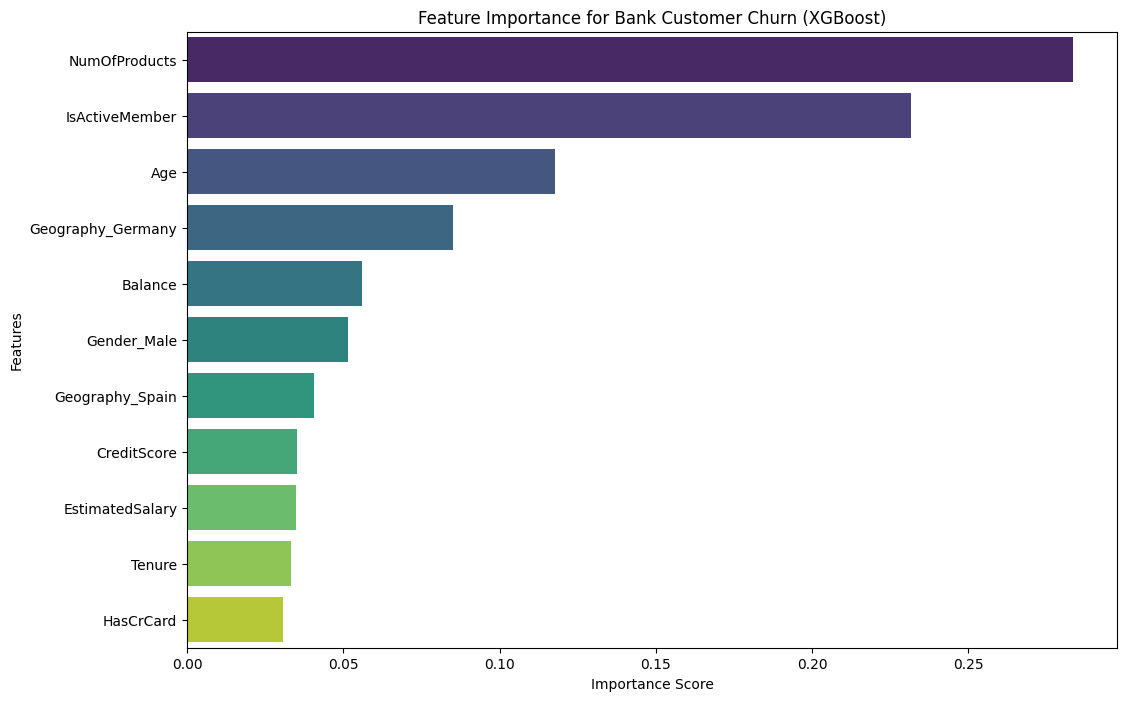

In [44]:
# Get feature importance from the model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Bank Customer Churn (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

### Interpretation of Feature Importance:
The feature importance plot provides a transparent view into the model's predictive logic. Here are the key takeaways:
- **Primary Driver - NumOfProducts:** This is the most significant predictor. It suggests that the variety of services a customer uses is strongly linked to their loyalty. Customers with too few or too many products might be at a higher risk of churning.
- **Engagement - IsActiveMember:** Being the second most important feature, it confirms that behavioral engagement is a critical signal. Inactive members have a significantly higher probability of leaving the bank.
- **Demographics - Age & Geography_Germany:** Age follows closely, indicating that different age groups have distinct churn patterns. Interestingly, being from Germany is a much stronger predictor of churn compared to other locations.
- **Financial Stability - Balance:** While important, account balance carries less weight than the customer's activity level and product count.
- **Lowest Impact:** Features like HasCrCard and Tenure have the least influence on the model’s final decision, suggesting they are not strong differentiators between those who stay and those who leave.

## Conclusion:
"In conclusion, the XGBoost model successfully identified bank churners with 87% accuracy. The analysis reveals that to reduce attrition, the bank should focus on increasing product penetration among customers and implementing engagement programs for inactive members. Special attention should also be given to the German market, as geography plays a notable role in customer retention."